In [1]:
from ucimlrepo import fetch_ucirepo 
from IPython.display import display
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def evaluate_and_plot(model, X_train, y_train, X_test, y_test, name="Modello"):
    # Addestramento
    model.fit(X_train, y_train)
    
    # Predizione
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    
    # Accuracy
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_test)
    
    # Stampa risultati
    scores_dict = {'Training Set': acc_train, 'Test Set': acc_test}
    scores = pd.DataFrame(scores_dict, index=['Accuracy'])
    display(scores)
    
    # Visualizza matrice di confusione
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.grid(False)
    plt.show()

    y_pred_df = pd.DataFrame({'Pred. Class': y_pred_test, 
                          'P(Class 0) - %': np.round(y_pred_proba[:, 0] * 100, decimals=2), 
                          'P(Class 1) - %': np.round(y_pred_proba[:, 1] * 100, decimals=2), 
                          'P(Class 2) - %': np.round(y_pred_proba[:, 2] * 100, decimals=2),
                          'P(Class 3) - %': np.round(y_pred_proba[:, 3] * 100, decimals=2),
                          'P(Class 4) - %': np.round(y_pred_proba[:, 4] * 100, decimals=2)})
    display(y_pred_df)

In [3]:
nursery = fetch_ucirepo(id=76) 

X = nursery.data.features 
y = nursery.data.targets

In [4]:
nursery_dataframe = pd.concat([X, y], axis=1)

display(nursery_dataframe)

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
...,...,...,...,...,...,...,...,...,...
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,spec_prior
12956,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,spec_prior
12958,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,spec_prior


# One-hot encoding #

In [5]:
# Copia del dataframe originale
nursery_dataframe_old = nursery_dataframe.copy()
onehot_cols = nursery_dataframe.columns.to_list()[:-1]

#Label encoding
labelenc_class = LabelEncoder()
labelenc_class.fit(nursery_dataframe['class'].values)
nursery_dataframe['class'] = labelenc_class.transform(nursery_dataframe['class'].values)

#for i, class_name in enumerate(labelenc_class.classes_):
#    print(f"Classe {i} → {class_name}")

# One-hot encoding
nursery_dataframe = pd.get_dummies(nursery_dataframe, columns=onehot_cols)

#nursery_dataframe.to_csv("nursery_dataframe.csv", index=False)

display(nursery_dataframe)

,class,parents_great_pret,parents_pretentious,parents_usual,has_nurs_critical,has_nurs_improper,has_nurs_less_proper,has_nurs_proper,has_nurs_very_crit,form_complete,...,housing_critical,housing_less_conv,finance_convenient,finance_inconv,social_nonprob,social_problematic,social_slightly_prob,health_not_recom,health_priority,health_recommended
0,2,False,False,True,False,False,False,True,False,True,...,False,False,True,False,True,False,False,False,False,True
1,1,False,False,True,False,False,False,True,False,True,...,False,False,True,False,True,False,False,False,True,False
2,0,False,False,True,False,False,False,True,False,True,...,False,False,True,False,True,False,False,True,False,False
3,2,False,False,True,False,False,False,True,False,True,...,False,False,True,False,False,False,True,False,False,True
4,1,False,False,True,False,False,False,True,False,True,...,False,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12955,3,True,False,False,False,False,False,False,True,False,...,True,False,False,True,False,False,True,False,True,False
12956,0,True,False,False,False,False,False,False,True,False,...,True,False,False,True,False,False,True,True,False,False
12957,3,True,False,False,False,False,False,False,True,False,...,True,False,False,True,False,True,False,False,False,True
12958,3,True,False,False,False,False,False,False,True,False,...,True,False,False,True,False,True,False,False,True,False


In [6]:
X = nursery_dataframe.iloc[:,1:].values
y = nursery_dataframe['class'].values

In [7]:
random_state = 42
np.random.seed(random_state)

test_p = 0.3

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_p, random_state=random_state, shuffle=True, stratify = y)

display(pd.DataFrame({'X_trainval': X_trainval.shape, 'X_test': X_test.shape}, index=['N. sanmples', 'N.features']))

print("Distribuzione delle classi (train):")
print(pd.Series(y_test).value_counts().sort_index())

,X_trainval,X_test
N. sanmples,9072,3888
N.features,27,27


Distribuzione delle classi (train):
0    1296
1    1280
2       1
3    1213
4      98
Name: count, dtype: int64


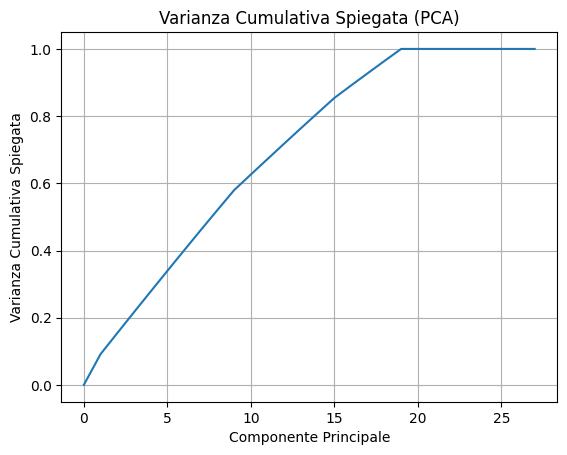

Numero di componenti principali selezionate: 17


In [8]:
# Inizializzazione oggetto PCA
explvar_p = 0.9
pca = PCA(n_components=explvar_p)

# "Fit" dell'oggetto PCA
X_trainval_pca = pca.fit_transform(X_trainval)
X_test_pca = pca.transform(X_test)

# PCA per il grafico
pca_graph = PCA()
pca_graph.fit(X_trainval)

# Calcoliamo la varianza spiegata cumulativa
expld_variance = np.insert(np.cumsum(pca_graph.explained_variance_ratio_), 0, 0)

# Creiamo il grafico della varianza cumulativa
plt.figure()
plt.plot(expld_variance)
plt.title('Varianza Cumulativa Spiegata (PCA)')
plt.xlabel('Componente Principale')
plt.ylabel('Varianza Cumulativa Spiegata')

plt.grid()
plt.show()
print(f"Numero di componenti principali selezionate: {pca.n_components_}")

# Grafico LDA 2-D su dati originali e su dati PCA-ridotti #

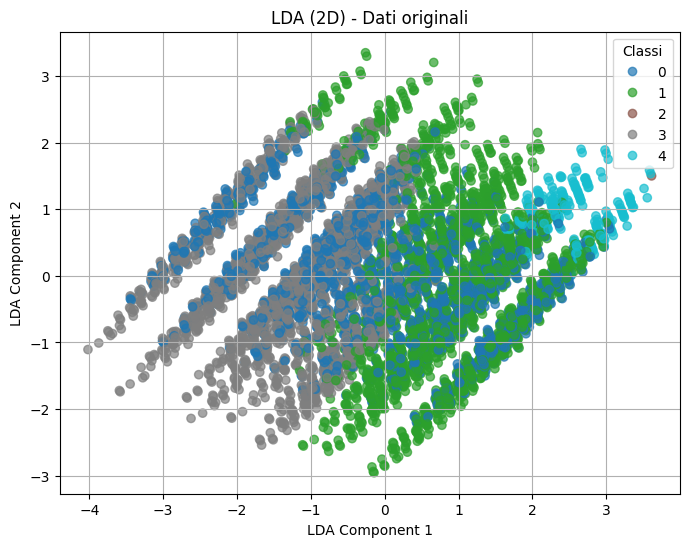

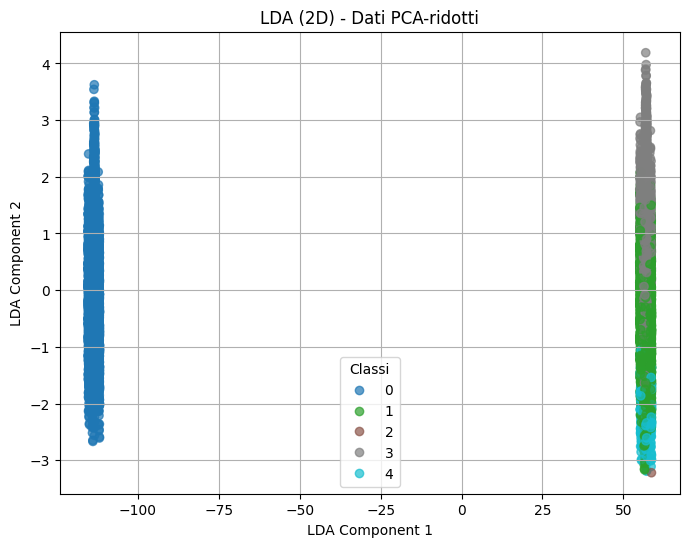

In [9]:
lda_vis = LDA(n_components=2)
X_lda_2d = lda_vis.fit_transform(X_trainval, y_trainval)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_lda_2d[:, 0], X_lda_2d[:, 1], c=y_trainval, cmap='tab10', alpha=0.7)
plt.title("LDA (2D) - Dati originali")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.legend(*scatter.legend_elements(), title="Classi")
plt.grid(True)
plt.show()

lda_vis_pca = LDA(n_components=2)
X_lda_2d_pca = lda_vis_pca.fit_transform(X_trainval_pca, y_trainval)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_lda_2d_pca[:, 0], X_lda_2d_pca[:, 1], c=y_trainval, cmap='tab10', alpha=0.7)
plt.title("LDA (2D) - Dati PCA-ridotti")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.legend(*scatter.legend_elements(), title="Classi")
plt.grid(True)
plt.show()

# Grafici LDA 3D per i dati originali e per quelli PCA-ridotti

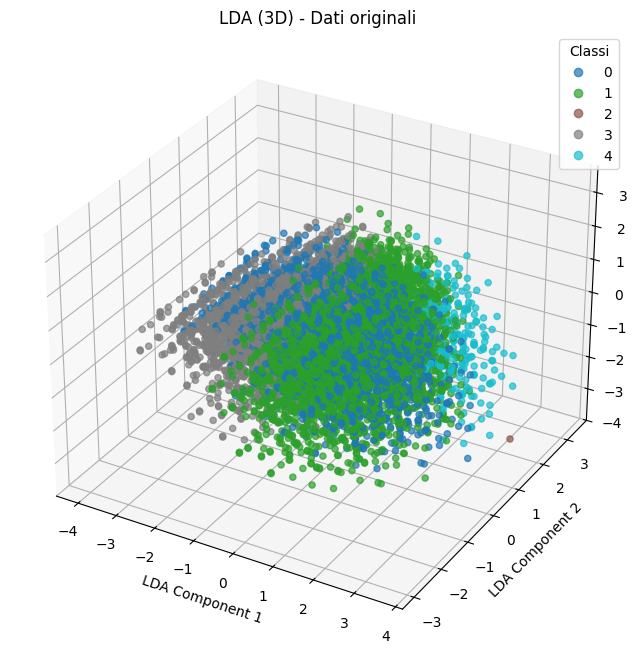

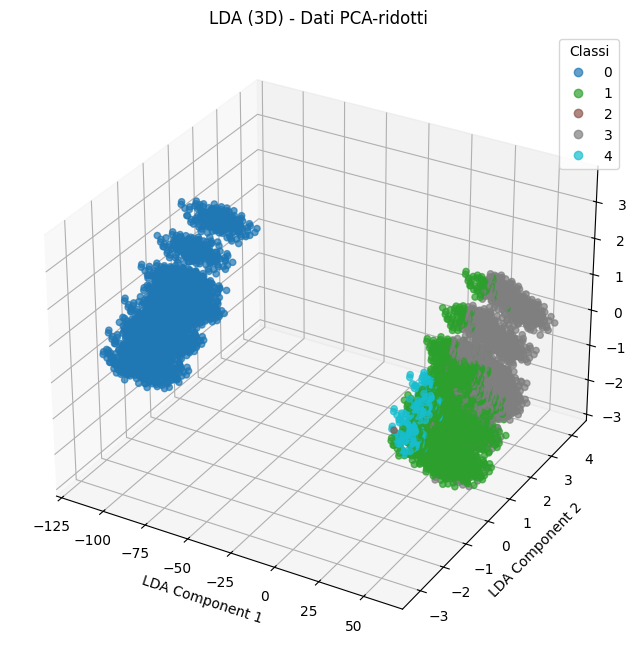

In [10]:
lda_3d = LDA(n_components=3)
X_lda_3d = lda_3d.fit_transform(X_trainval, y_trainval)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_lda_3d[:, 0], X_lda_3d[:, 1], X_lda_3d[:, 2], 
                     c=y_trainval, cmap='tab10', alpha=0.7)
ax.set_title("LDA (3D) - Dati originali")
ax.set_xlabel("LDA Component 1")
ax.set_ylabel("LDA Component 2")
ax.set_zlabel("LDA Component 3")
legend = ax.legend(*scatter.legend_elements(), title="Classi", loc="best")
plt.show()

lda_3d_pca = LDA(n_components=3)
X_lda_3d_pca = lda_3d_pca.fit_transform(X_trainval_pca, y_trainval)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_lda_3d_pca[:, 0], X_lda_3d_pca[:, 1], X_lda_3d_pca[:, 2], 
                     c=y_trainval, cmap='tab10', alpha=0.7)
ax.set_title("LDA (3D) - Dati PCA-ridotti")
ax.set_xlabel("LDA Component 1")
ax.set_ylabel("LDA Component 2")
ax.set_zlabel("LDA Component 3")
legend = ax.legend(*scatter.legend_elements(), title="Classi", loc="best")
plt.show()

# LDA come classificatore

,Training Set,Test Set
Accuracy,0.542549,0.552726


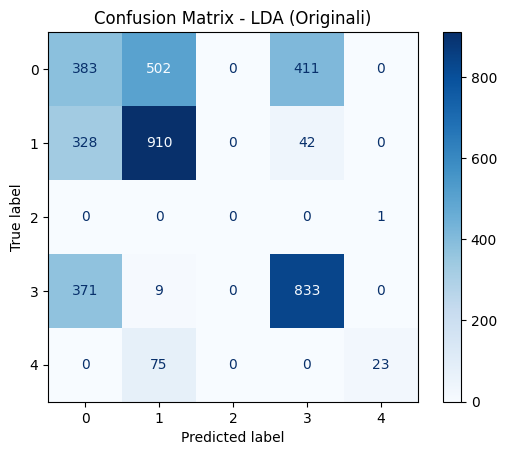

,Pred. Class,P(Class 0) - %,P(Class 1) - %,P(Class 2) - %,P(Class 3) - %,P(Class 4) - %
0,1,30.41,64.67,0.0,3.51,1.40
1,1,39.34,49.35,0.0,11.23,0.07
2,3,20.82,2.69,0.0,76.49,0.00
3,0,46.52,37.63,0.0,13.41,2.44
4,0,44.55,31.02,0.0,24.39,0.04
...,...,...,...,...,...,...
3883,3,34.06,8.73,0.0,57.21,0.00
3884,1,12.07,73.21,0.0,0.37,14.35
3885,0,47.96,30.16,0.0,21.25,0.63
3886,3,26.13,3.76,0.0,70.10,0.01


,Training Set,Test Set
Accuracy,0.823302,0.813014


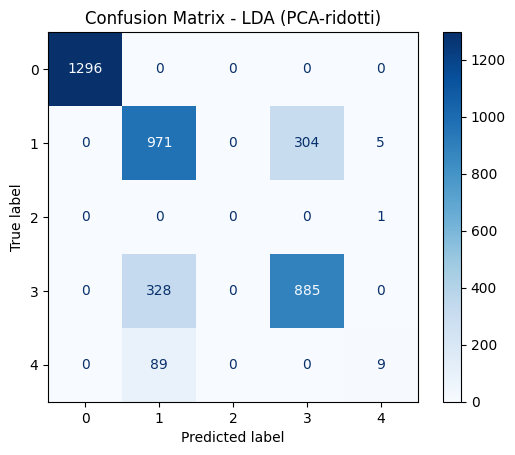

,Pred. Class,P(Class 0) - %,P(Class 1) - %,P(Class 2) - %,P(Class 3) - %,P(Class 4) - %
0,0,100.0,0.00,0.0,0.00,0.00
1,3,0.0,46.98,0.0,52.95,0.07
2,3,0.0,8.78,0.0,91.21,0.01
3,1,0.0,66.64,0.0,21.99,11.38
4,0,100.0,0.00,0.0,0.00,0.00
...,...,...,...,...,...,...
3883,1,0.0,57.75,0.0,42.18,0.07
3884,1,0.0,83.97,0.0,3.54,12.49
3885,1,0.0,62.77,0.0,33.38,3.85
3886,3,0.0,14.11,0.0,85.77,0.13


In [11]:
lda = LDA()

evaluate_and_plot(lda, X_trainval, y_trainval, X_test, y_test, name="LDA (Originali)")
evaluate_and_plot(lda, X_trainval_pca, y_trainval, X_test_pca, y_test, name="LDA (PCA-ridotti)")

# SVM

Non posso usare la Gridsearch perchè una classe ha solo un valore

In [14]:

best_score = 0
best_C = None

for C in [0.01, 0.1, 1, 10]:
    model = SVC(kernel='linear', C=C, probability=True, random_state=42)
    model.fit(X_trainval_pca, y_trainval_pca)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"C={C}, Accuracy={acc}")
    
    if acc > best_score:
        best_score = acc
        best_C = C

print(f"Miglior valore di C: {best_C}, Accuracy: {best_score}")

C=0.01, Accuracy=0.9120370370370371
C=0.1, Accuracy=0.926954732510288
C=1, Accuracy=0.9300411522633745
C=10, Accuracy=0.9305555555555556
Miglior valore di C: 10, Accuracy: 0.9305555555555556


,Training Set,Test Set
Accuracy,0.926367,0.926955


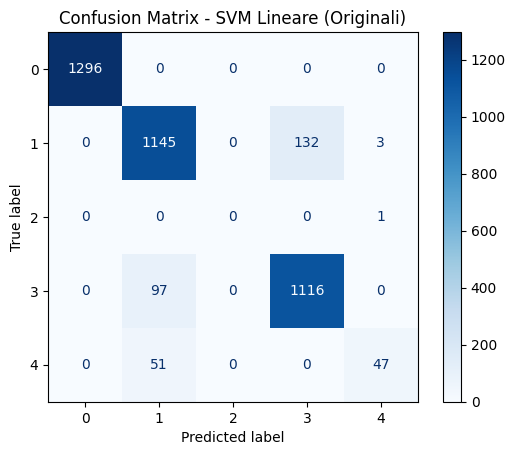

,Pred. Class,P(Class 0) - %,P(Class 1) - %,P(Class 2) - %,P(Class 3) - %,P(Class 4) - %
0,0,99.92,0.03,0.02,0.01,0.02
1,1,0.05,95.12,0.01,4.50,0.33
2,3,0.02,0.41,0.01,99.56,0.00
3,1,0.02,87.47,0.02,12.37,0.13
4,0,99.92,0.03,0.01,0.03,0.01
...,...,...,...,...,...,...
3883,3,0.02,9.16,0.01,90.78,0.02
3884,1,0.03,88.18,0.03,0.01,11.75
3885,1,0.01,58.89,0.01,40.96,0.12
3886,3,0.02,0.70,0.03,99.25,0.00


,Training Set,Test Set
Accuracy,0.831239,0.822274


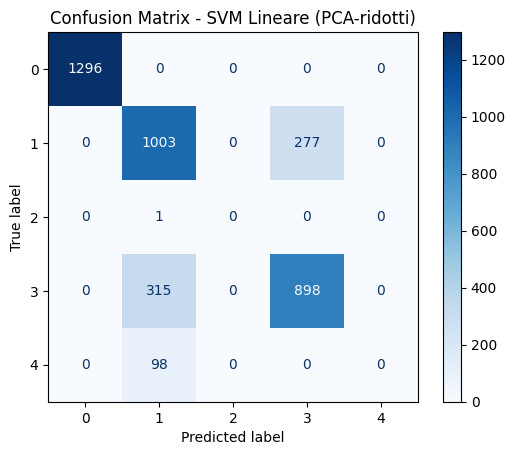

,Pred. Class,P(Class 0) - %,P(Class 1) - %,P(Class 2) - %,P(Class 3) - %,P(Class 4) - %
0,0,99.93,0.02,0.01,0.02,0.01
1,1,0.03,56.64,0.01,43.32,0.00
2,3,0.02,8.91,0.01,91.06,0.00
3,1,0.09,59.82,0.13,33.62,6.34
4,0,99.91,0.03,0.01,0.03,0.01
...,...,...,...,...,...,...
3883,1,0.03,68.29,0.01,31.67,0.00
3884,1,0.03,82.89,0.06,3.52,13.51
3885,1,0.01,49.73,0.02,49.72,0.52
3886,3,0.02,10.24,0.03,89.70,0.00


In [16]:
svc_linear = SVC(kernel='linear', C = 0.1, probability=True, random_state = 42)

evaluate_and_plot(svc_linear, X_trainval, y_trainval, X_test, y_test, name="SVM Lineare (Originali)")
evaluate_and_plot(svc_linear, X_trainval_pca, y_trainval, X_test_pca, y_test, name="SVM Lineare (PCA-ridotti)")

In [ ]:
svc_rbf = SVC(kernel='rbf', probability=True, random_state = 42)
param_grid_rbf = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

grid_rbf = GridSearchCV(svc_rbf, param_grid_rbf, cv=5)
grid_rbf.fit(X_train, y_train)

evaluate_and_plot(grid_rbf, X_train, y_train, X_test, y_test, name="SVM RBF (Originali)")
evaluate_and_plot(grid_rbf, X_trainval_pca, y_trainval, X_test_pca, y_test, name="SVM RBF (PCA-originali)")

,acc. (C = 5),acc. (C = 1e2)
training_pca,0.944599,0.999691
test_pca,0.935494,0.999074


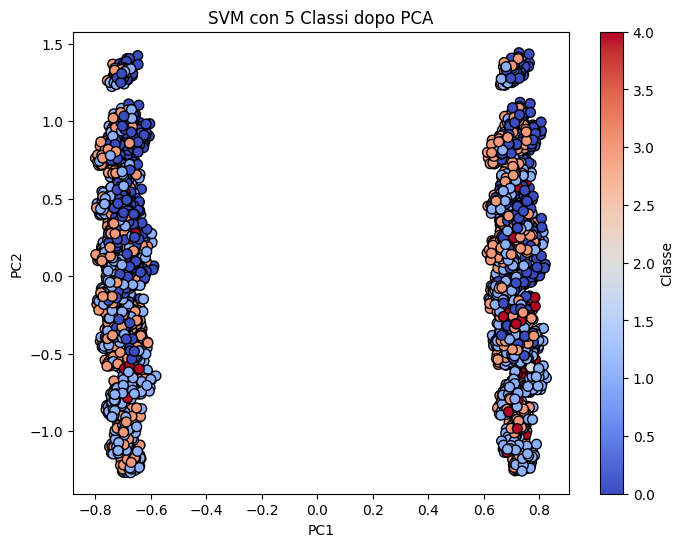

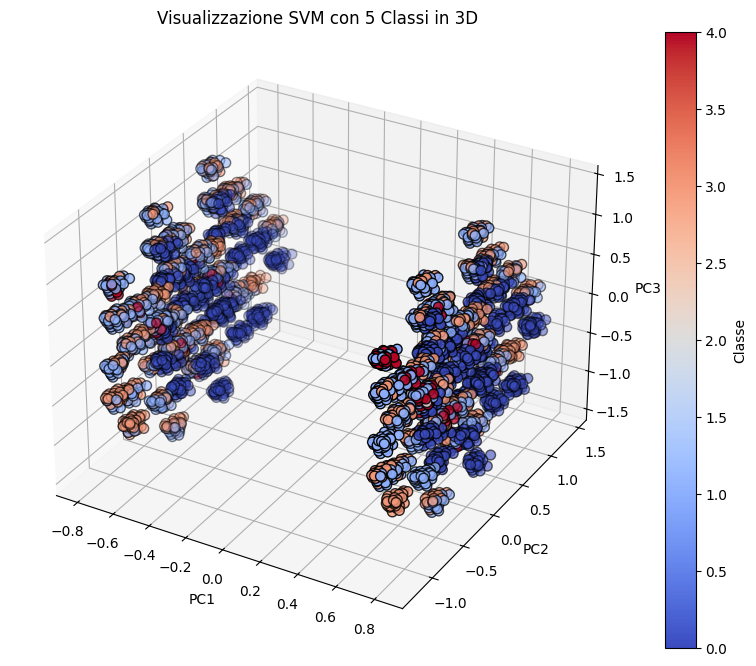

In [13]:
#SVM non lineare sui dati ridotti dalla PCA

ker_rbf = 'rbf'
gamma_rbf = 'auto'

C1 = 5
C2 = 1e2

# Inizializzazione SVM
svm_rbf_1 = SVC(C=C1, kernel=ker_rbf, gamma=gamma_rbf, random_state=random_state)
svm_rbf_2 = SVC(C=C2, kernel=ker_rbf, gamma=gamma_rbf, random_state=random_state)

# Addestramento SVM
svm_rbf_1.fit(X_trainval_pca, y_trainval)
svm_rbf_2.fit(X_trainval_pca, y_trainval)

# Dataframe con accuratezza su training e test set (visualizzare con funzione 'display')
df_svm_rbf_pca = pd.DataFrame({'acc. (C = 5)': [svm_rbf_1.score(X_trainval_pca, y_trainval), svm_rbf_1.score(X_test_pca, y_test)],
                               'acc. (C = 1e2)': [svm_rbf_2.score(X_trainval_pca, y_trainval), svm_rbf_2.score(X_test_pca, y_test)]},
                               index=['training_pca', 'test_pca'])
display(df_svm_rbf_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_trainval_pca[:, 0], X_trainval_pca[:, 1], c=y_trainval, cmap=plt.cm.coolwarm, edgecolors='k', marker='o', s=50)
plt.title('SVM con 5 Classi dopo PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Classe')
plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot dei punti nel nuovo spazio ridotto
scatter = ax.scatter(X_trainval_pca[:, 0], X_trainval_pca[:, 1], X_trainval_pca[:, 2], c=y_trainval, cmap=plt.cm.coolwarm, edgecolors='k', marker='o', s=50)

# Aggiungere etichette agli assi
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Visualizzazione SVM con 5 Classi in 3D')

# Aggiungere la barra dei colori per le classi
cbar = plt.colorbar(scatter, ax=ax, label='Classe')

plt.show()